In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
df=pd.read_csv("failure.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.head(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0


In [8]:
df.tail(3)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [9]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [10]:
df["date"]=pd.to_datetime(df["date"])

In [11]:
df["year"]=2021-df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day

In [12]:
df.sample()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
99874,2015-07-05,Z1F0MBGF,0,114405320,0,0,0,57,249097,0,0,0,6,7,5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute8  124494 non-null  int64         
 11  attribute9  124494 non-null  int64         
 12  year        124494 non-null  int64         
 13  month       124494 non-null  int64         
 14  day         124494 non-null  int64         
dtypes: datetime64[ns](1), int64(13), object(1)
memory u

In [14]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,NaN,0.000321,0.002994
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,NaN,-0.005613,-0.000239
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,NaN,-0.006416,-0.010000
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,NaN,-0.001101,-0.004232
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,NaN,-0.005490,-0.008383
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,NaN,-0.014129,0.009526
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,NaN,0.138159,0.019483
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,NaN,0.020576,0.009194
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,NaN,-0.025383,-0.012316


In [15]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.0,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,6.0,4.028299,14.894196
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,0.0,2.572167,8.759542
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,6.0,1.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,6.0,2.000000,7.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,6.0,3.000000,15.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,6.0,6.000000,22.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,6.0,11.000000,31.000000


In [16]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute8    0.119055
attribute7    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6    0.000550
attribute3    0.000948
year               NaN
Name: failure, dtype: float64

<AxesSubplot:>

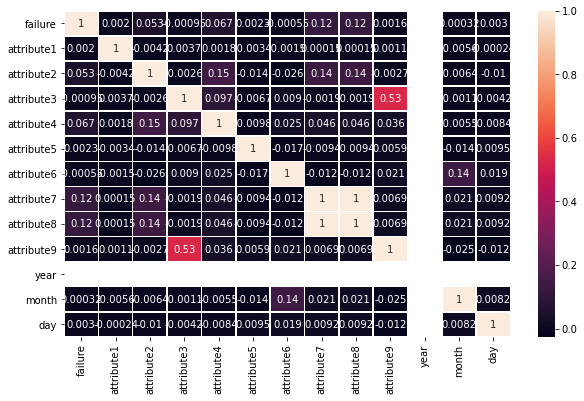

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [18]:
#heatmap tablosunda da görüldüğü gibi attribute7 ve attribute8 birbirinin tekrarı olduğundan çıkartılabilir
(df["attribute7"]==df["attribute8"]).value_counts()

True    124494
dtype: int64

In [19]:
#Year tablosunda da tüm tarihler 2015 olduğundan dolayı sonucumuzu etkilemeyeceğinden çıkartalım
df.year.value_counts()

6    124494
Name: year, dtype: int64

In [20]:
df.drop(["attribute8","year"],axis=1,inplace=True)

In [21]:
#tablo incelendiğinde attribute'lar int değerindedir. Ama birbirlerine sayısal olarak bir üstünkleri olmadığından object veya category türüne döndürülebilir
#for i in df.columns:
    #if "attribute" in i:
        #df[i]=df[i].astype("object")  

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        124494 non-null  datetime64[ns]
 1   device      124494 non-null  object        
 2   failure     124494 non-null  int64         
 3   attribute1  124494 non-null  int64         
 4   attribute2  124494 non-null  int64         
 5   attribute3  124494 non-null  int64         
 6   attribute4  124494 non-null  int64         
 7   attribute5  124494 non-null  int64         
 8   attribute6  124494 non-null  int64         
 9   attribute7  124494 non-null  int64         
 10  attribute9  124494 non-null  int64         
 11  month       124494 non-null  int64         
 12  day         124494 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 12.3+ MB


In [24]:
df["failure"].value_counts()

0    124388
1       106
Name: failure, dtype: int64

<AxesSubplot:>

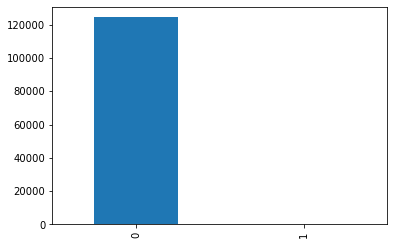

In [25]:
df["failure"].value_counts().plot.bar()

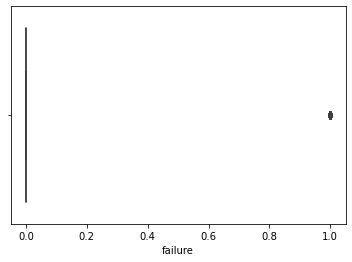

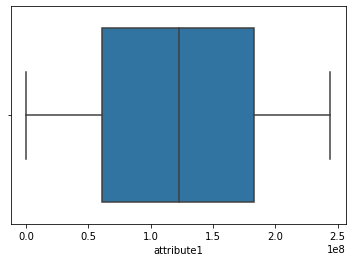

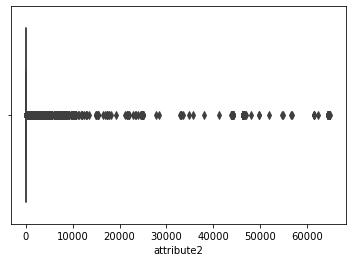

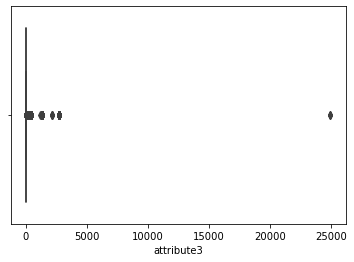

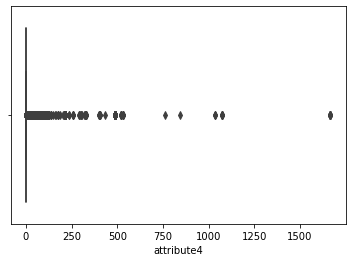

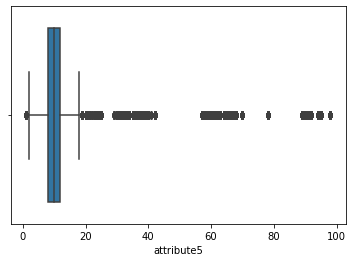

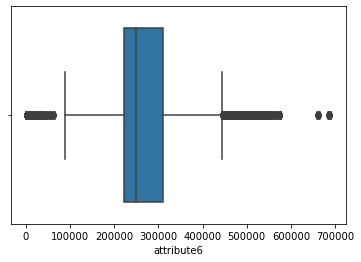

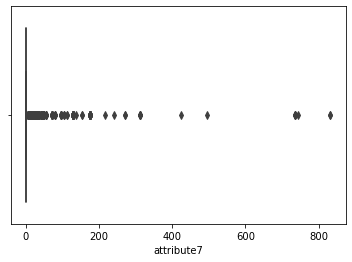

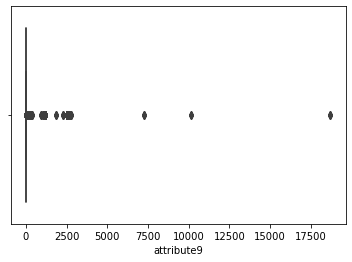

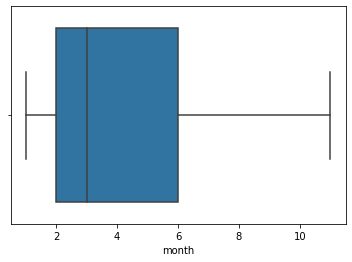

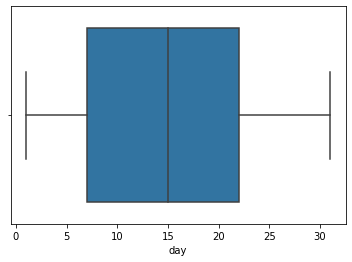

In [26]:
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i])
    plt.show()

In [27]:
df.sample()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,month,day
36747,2015-02-17,W1F0F65G,0,136829456,0,0,0,10,245058,0,1,2,17


In [ ]:
del df["date"]

In [32]:
df=pd.get_dummies(df,drop_first=True)

In [33]:
x,y=df.drop("failure",axis=1),df["failure"]

In [34]:
x.shape,y.shape

((124494, 1177), (124494,))

In [35]:
y.value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [30]:
#pip install imblearn.under_sampling

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement imblearn.under_sampling (from versions: none)
ERROR: No matching distribution found for imblearn.under_sampling


In [38]:
#pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\easan\anaconda3\lib\site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [46]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)  


#### <font color="green"><b>NOT:</b> 0=>(124388) 1=>(106) dikkat edilirse 1 veri sayısı classification yapmak için yeterli miktarda değil. O yüzden  imblearn kütüphanesi kullanıldı. F1 skoru, sınıflandırıcınız için hassasiyet ve geri çağırma arasında bir denge sağlar. Hassasiyetiniz düşükse, F1 düşüktür ve geri çağırma yine düşükse, F1 puanınız düşük çıkmıştır..</font>

In [47]:
classification_funct(x,y)

[01:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy_score,f1_score,recall_score,precision_score
GaussianNB,0.990939,0.020833,0.081081,0.011952
BernoulliNB,0.888029,0.015259,0.729730,0.007710
GradientBoostingClassifier,0.871867,0.011893,0.648649,0.006002
RandomForestClassifier,0.863546,0.012096,0.702703,0.006100
DecisionTreeClassifier,0.853232,0.009540,0.594595,0.004809
XGBClassifier,0.830195,0.010855,0.783784,0.005466
SVC,0.645868,0.002895,0.432432,0.001452
KNeighborsClassifier,0.490265,0.002264,0.486486,0.001135
LogisticRegression,0.001189,0.002375,1.000000,0.001189


## Deep Lerning uygulanırsa?

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)

RUS=RandomUnderSampler(random_state=42)
x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)

In [60]:
model=Sequential()
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history = model.fit(x_RUS,y_RUS, batch_size=128, epochs=40, verbose=1, validation_data=(x_test,y_test))

Epoch 1/40
2/2 [==============================] - 3s 2s/step - loss: 512854.8646 - accuracy: 0.5123 - val_loss: 4147.2559 - val_accuracy: 0.9988
Epoch 2/40
2/2 [==============================] - 1s 1s/step - loss: 1851523.2500 - accuracy: 0.4632 - val_loss: 1486792.8750 - val_accuracy: 0.0012
Epoch 3/40
2/2 [==============================] - 1s 1s/step - loss: 757436.6250 - accuracy: 0.5000 - val_loss: 3557.9033 - val_accuracy: 0.9988
Epoch 4/40
2/2 [==============================] - 1s 1s/step - loss: 1439879.8333 - accuracy: 0.4974 - val_loss: 1177455.3750 - val_accuracy: 0.0012
Epoch 5/40
2/2 [==============================] - 1s 1s/step - loss: 598698.9583 - accuracy: 0.5078 - val_loss: 372594.0938 - val_accuracy: 0.0015
Epoch 6/40
2/2 [==============================] - 1s 1s/step - loss: 197756.0208 - accuracy: 0.5000 - val_loss: 2155.7581 - val_accuracy: 0.9988
Epoch 7/40
2/2 [==============================] - 1s 1s/step - loss: 881299.8750 - accuracy: 0.5000 - val_loss: 682.7745

In [62]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

973/973 [==============================] - 2s 2ms/step - loss: 52.0210 - accuracy: 0.9984
Accuracy: 99.84


In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


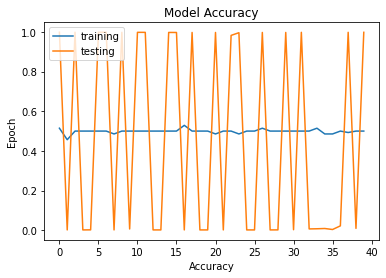

In [64]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

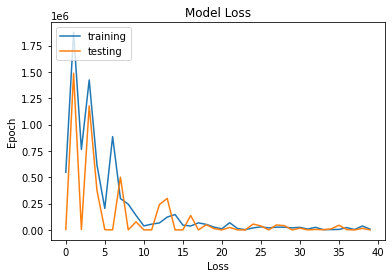

In [65]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show